In [26]:
# Import libraries
import os
from dotenv import load_dotenv
from IPython.display import display, Image
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
# Load environment
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [8]:
# Define LLM
model = ChatOpenAI(model="gpt-4o")

In [16]:
# Define Graph State
class State(TypedDict):
    question: str
    answer: str

In [17]:
# Define llm response function
def ask_llm(state:State)-> State:
    try:
        question = state.get("question", "")
        if not question:
            raise Exception("Please enter your question")
        response = model.invoke(question)
        return { "answer": response.content }
    except Exception as e:
        print(f"Exception: {e}")

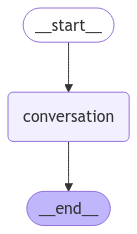

In [18]:
# Define graph
workflow = StateGraph(State)
# Add nodes
workflow.add_node("conversation", ask_llm)
# Add edges
workflow.add_edge(START, "conversation")
workflow.add_edge("conversation", END)

# Compile graph
graph = workflow.compile()
# Display graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
# Graph invokation
def invoke_graph(question):
    output = graph.invoke({"question": question})
    print(f"Question:{output['question']}\n\n")
    print(f"Answer: {output['answer']}")

In [25]:
invoke_graph("What is langchain?")

Question:What is langchain?


Answer: LangChain is a framework designed to simplify the development of applications using large language models (LLMs). It provides a set of tools and abstractions that make it easier to build complex applications that can leverage the power of LLMs for a variety of tasks. LangChain focuses on several key areas:

1. **Model Integration**: It provides seamless integration with various LLM providers, making it easier to switch between different models or use multiple models within the same application.

2. **Data Augmentation**: LangChain offers utilities to enhance the data that is fed into language models, such as retrieval-augmented generation, which combines the language model with external knowledge sources.

3. **Memory Management**: The framework includes components that help manage conversational memory, allowing applications to maintain context over long interactions.

4. **Agent Abstraction**: LangChain provides an agent abstraction that enables 

In [27]:
invoke_graph("Where it is available?")

Question:Where it is available?


Answer: Could you please clarify what you are referring to? Are you asking about the availability of a specific product, service, or information? Let me know so I can assist you better.
